# AUDIBLE CATALOG EDA

Importing the important libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
print("Setup complete")

Setup complete


Importing the datasets. We use ```read_csv``` for the same.

In [50]:
audiob = pd.read_csv(r"C:\Users\peer1\OneDrive\Documents\Guvi_Projects\4.Intelligent Book Recommendations\data\Audible_Catlog.csv")
audiob_adv = pd.read_csv(r"C:\Users\peer1\OneDrive\Documents\Guvi_Projects\4.Intelligent Book Recommendations\data\Audible_Catlog_Advanced_Features.csv")

# Sneak Peak of the dataset

Let us see what our dataset looks like.
<br> For this, ```head()``` function is used

In [52]:
audiob.head(5)

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0


In [53]:
audiob_adv.head(5)

,Book Name,Author,Rating,Number of Reviews,Price,Description,Listening Time,Ranks and Genre
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",10 hours and 54 minutes,",#1 in Audible Audiobooks & Originals (See Top..."
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,3 hours and 23 minutes,",#2 in Audible Audiobooks & Originals (See Top..."
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",5 hours and 17 minutes,",#3 in Audible Audiobooks & Originals (See Top..."
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,5 hours and 35 minutes,",#5 in Audible Audiobooks & Originals (See Top..."
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",6 hours and 25 minutes,",#6 in Audible Audiobooks & Originals (See Top..."


My first intuition on looking at the data was, there is some error in price. So I did a cross check of the same.

The price of ['Think Like a Monk'](https://www.audible.in/pd/Think-Like-A-Monk-Audiobook/B07YSQ8GT5?plink=rJ6ts4I7l48a8A1E&ref=a_hp_c4_adblp13nbssx_1_1&pf_rd_p=b1ea9011-ff9b-499a-a399-9843ffcbd0f5&pf_rd_r=MAH06E8SRNDH717BXZHZ) and ['Subtle art...'](https://www.audible.in/pd/The-Subtle-Art-of-Not-Giving-a-F-ck-Audiobook/B079BC54JT?plink=LLoP79JfMWa0iHlG&ref=a_pd_Think-_c2_adblp13npsbx_1_3&pf_rd_p=a55f3f73-7c6c-4aac-8ad0-05045d19c470&pf_rd_r=28HQJKEDV597MNA1RDTS) is actually 10k+

😬

As we can see that the Listening Time column is not suitable for computation. We will extract the numbers and convert them to minutes. For this I am using regex.

## RegEx
RegEx is the short form of Regular Expression. RegEx helps in finding patterns in the string, which is used to locate, manage and match texts.

In [54]:
temp_df = audiob_adv['Listening Time'].str.extract(r'(\d+)[^\d]+(\d+)').astype('float64')
audiob_adv["Time"] = temp_df.iloc[:,0]*60 + temp_df.iloc[:,1]

Dropping the columns, which we dont want. 
Dropping 

Listening Time -> We have extracted the time out of it

Ranks And Genres -> We wont be using that in our analysis

In [55]:
audiob_adv.drop(['Listening Time','Ranks and Genre'], axis = 1)

,Book Name,Author,Rating,Number of Reviews,Price,Description,Time
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,371.0,10080,"Over the past three years, Jay Shetty has beco...",654.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3682.0,615,Brought to you by Penguin.,203.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20306.0,10378,"In this generation-defining self-help guide, a...",317.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4678.0,888,Brought to you by Penguin.,335.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4308.0,1005,"Stop going through life, Start growing throug...",385.0
...,...,...,...,...,...,...,...
4459,"Factfulness: Wie wir lernen, die Welt so zu se...",Hans Rosling,4.6,72.0,703,"Sorry, we just need to make sure you're not a ...",NaN
4460,Late-Talking Children: A Symptom or a Stage?,Stephen M. Camarata,4.6,92.0,703,"Sorry, we just need to make sure you're not a ...",NaN
4461,"The Marketing of Evil: How Radicals, Elitists ...",David Kupelian,4.7,490.0,586,"Americans have come to tolerate, embrace, and ...",NaN
4462,Things I Wish I'd Known Before We Got Married,Gary Chapman,4.7,1388.0,516,\n\nOops!\nIt's rush hour and traffic is pilin...,NaN


Since ```audiob_adv``` has the columns present in ```audiob``` along with others. That is why we will proceed with the former.

# Cleaning the dataset

Checking for any missing data. To check this, I am using the ```isnull``` function

In [56]:
audiob_adv.isnull().values.any()

True

We can see that we have certain missing data.

So, let us see where we have the missing data

To visualise where the missing data are, I will use ```heatmap``` from the seaborn library

<Axes: >

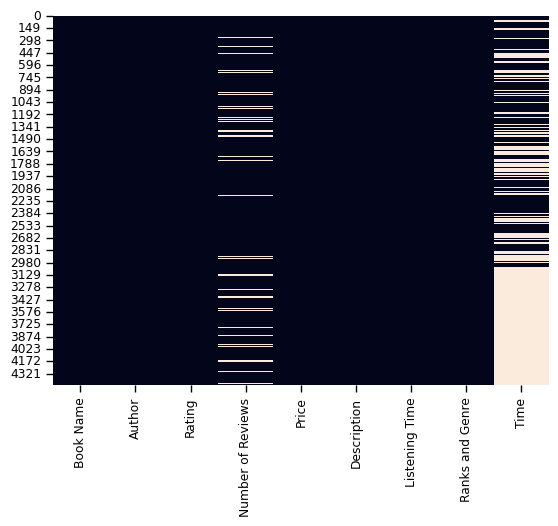

In [57]:
sns.heatmap(audiob_adv.isnull(), cbar=False)

To deal with the missing values, I am using the ```fillna``` function, and filling up the missing values with "Not available".

I am filling the null values of Time, with 10 minutes.

In [58]:
audiob_adv["Number of Reviews"].fillna(0, inplace = True)
audiob_adv["Time"].fillna(10, inplace = True)

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\1132207801.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  audiob_adv["Number of Reviews"].fillna(0, inplace = True)
C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\1132207801.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



Let us see again, at the heatmap again

<Axes: >

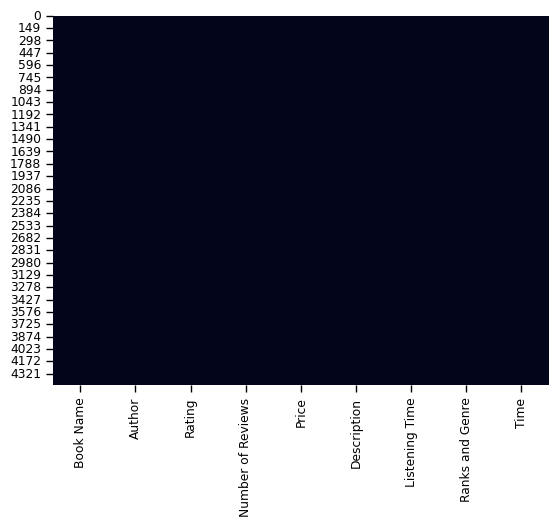

In [59]:
sns.heatmap(audiob_adv.isnull(), cbar=False)

## Outliers

Renaming columns for ease of computation

In [60]:
audiob_adv.rename(columns = {"Number of Reviews": "Number_of_Reviews"},  
                             inplace = True)

Here I am changing the type of Price and Number of Reviews columns. For this, I am using ```astype``` function

In [61]:
audiob_adv["Number_of_Reviews"] = audiob_adv.Number_of_Reviews.astype(float)
audiob_adv["Price"] = audiob_adv.Price.astype(float)


### Price

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\652622955.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=audiob_adv['Price'],palette = 'colorblind')


<Axes: xlabel='Price'>

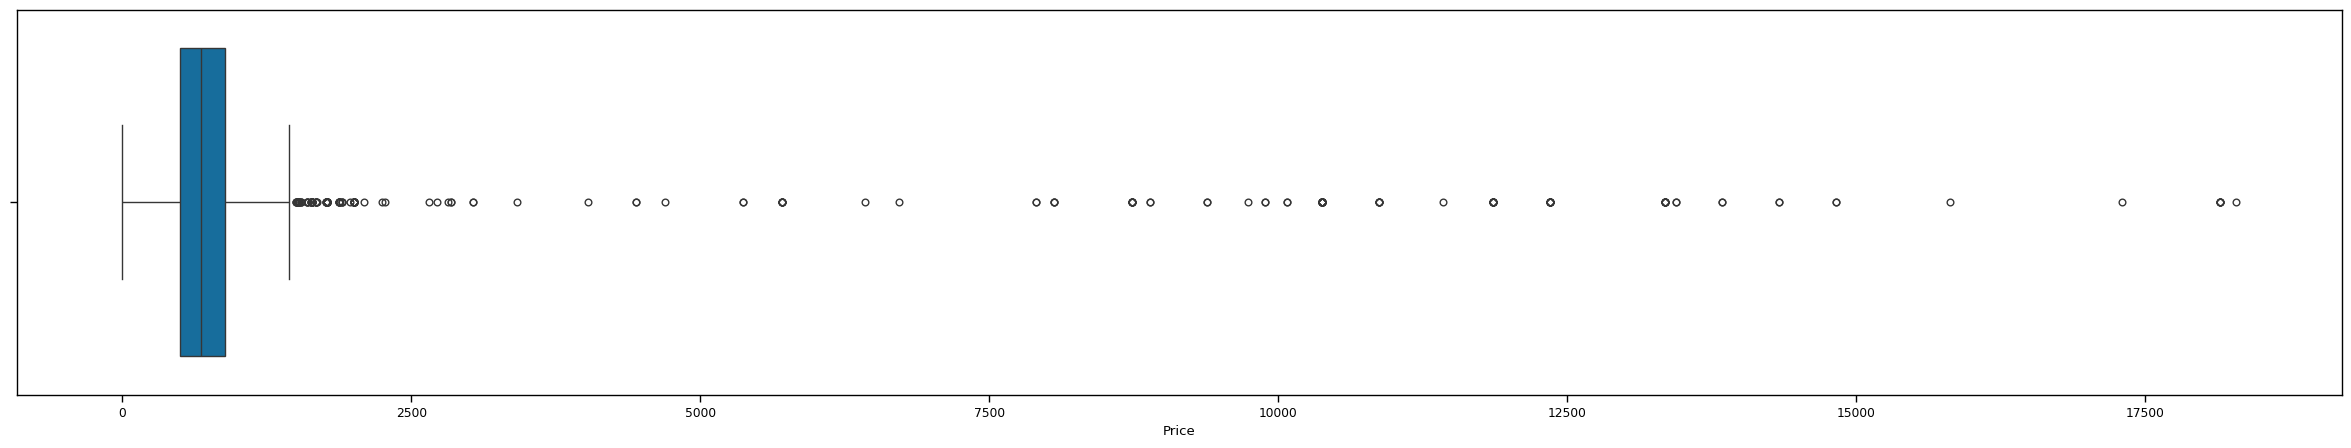

In [62]:
plt.figure(figsize=(30,5))
sns.boxplot(x=audiob_adv['Price'],palette = 'colorblind')

We can see that the range of price goes from 0 to 17500. But as seen earlier, these are not wrong values and dropping them can affect the analysis. [This article](https://medium.com/@Ipshita/outlier-what-to-do-439e21899a98) gives a brief information for outliers.

### Rating

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\1818311290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=audiob_adv['Rating'],palette = 'colorblind')


<Axes: xlabel='Rating'>

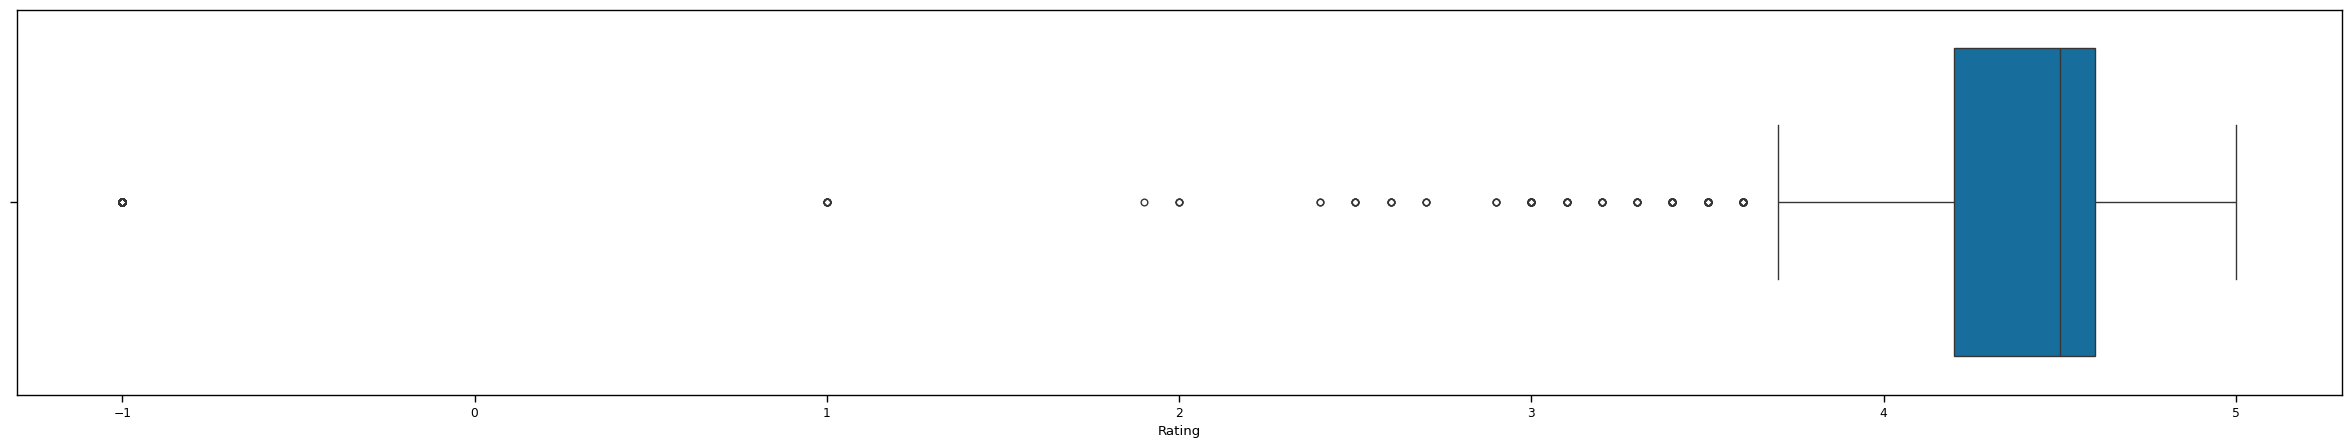

In [63]:
plt.figure(figsize=(30,5))
sns.boxplot(x=audiob_adv['Rating'],palette = 'colorblind')

The point at -1 is impossible, so we will drop it.

In [64]:
audiob_adv = audiob_adv[~(audiob_adv['Rating']<=0)]

Replotting again

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\1818311290.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=audiob_adv['Rating'],palette = 'colorblind')


<Axes: xlabel='Rating'>

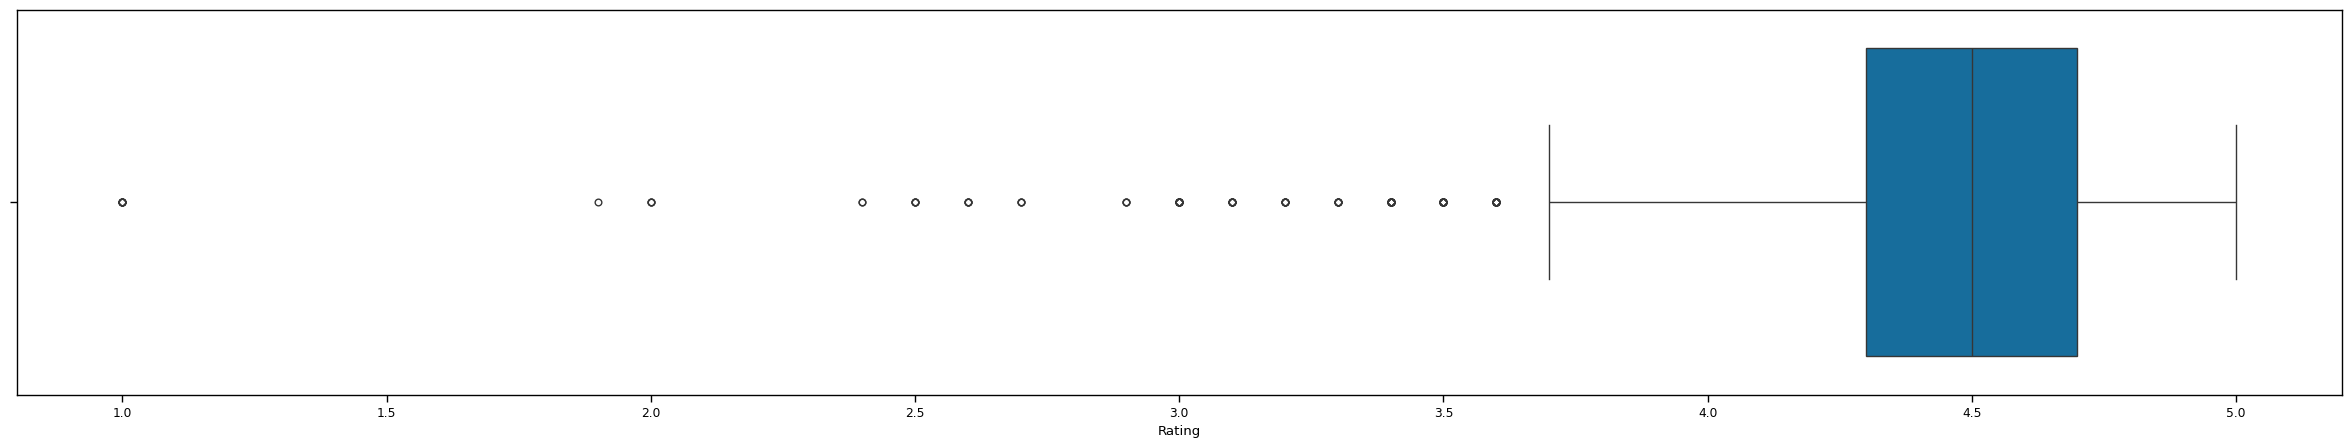

In [65]:
plt.figure(figsize=(30,5))
sns.boxplot(x=audiob_adv['Rating'],palette = 'colorblind')

Better. 

### Time

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\2629173571.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=audiob_adv['Time'],palette = 'colorblind')


<Axes: xlabel='Time'>

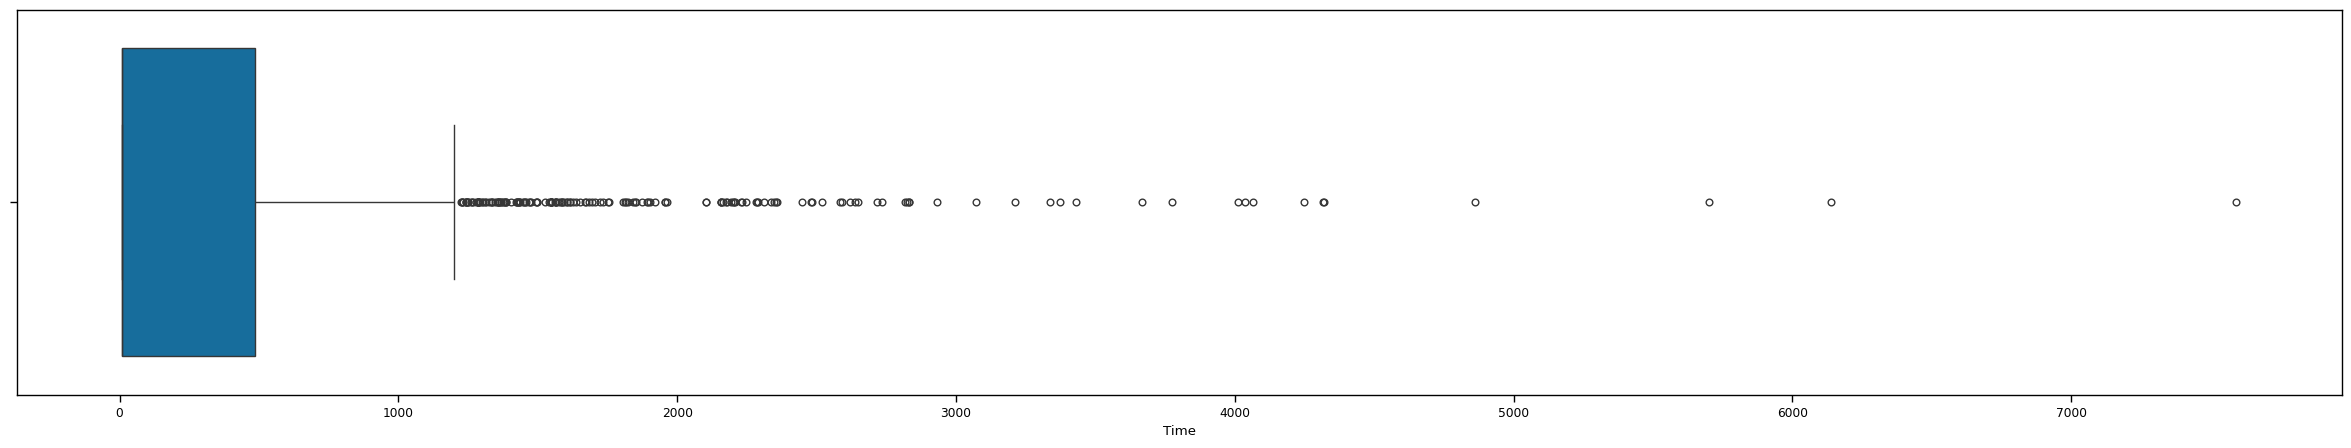

In [66]:
plt.figure(figsize=(30,5))
sns.boxplot(x=audiob_adv['Time'],palette = 'colorblind')

The longest running book is more than 7000 minutes, which is approximately 5 days. 

# Exploratory Data Analysis

## Author Feature

### Most Frequent Authors

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\3479666162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Author', data=cnt, palette='deep', orient='h')


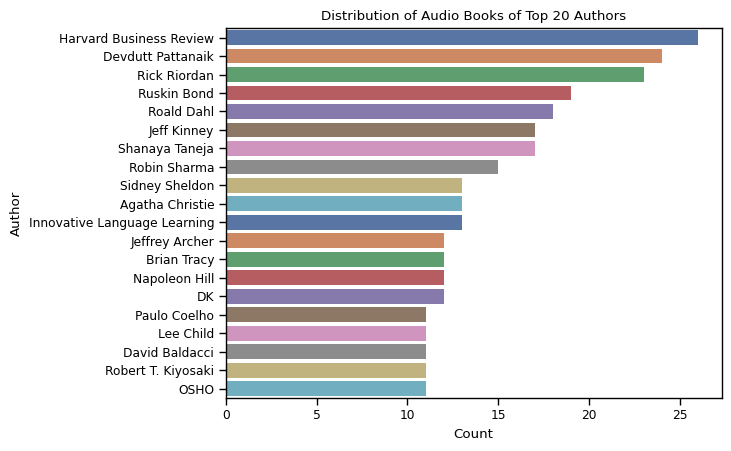

In [67]:
cnt = audiob_adv['Author'].value_counts().to_frame().reset_index().head(20)
cnt.columns = ['Author', 'Count']
sns.barplot(x='Count', y='Author', data=cnt, palette='deep', orient='h')
plt.title('Distribution of Audio Books of Top 20 Authors')
plt.show()


We can see **Harvard Business Review** at the top, followed by **Devdutt Pattanaik**

### Most Expensive books by different Authors

Text(0.5, 0, '')

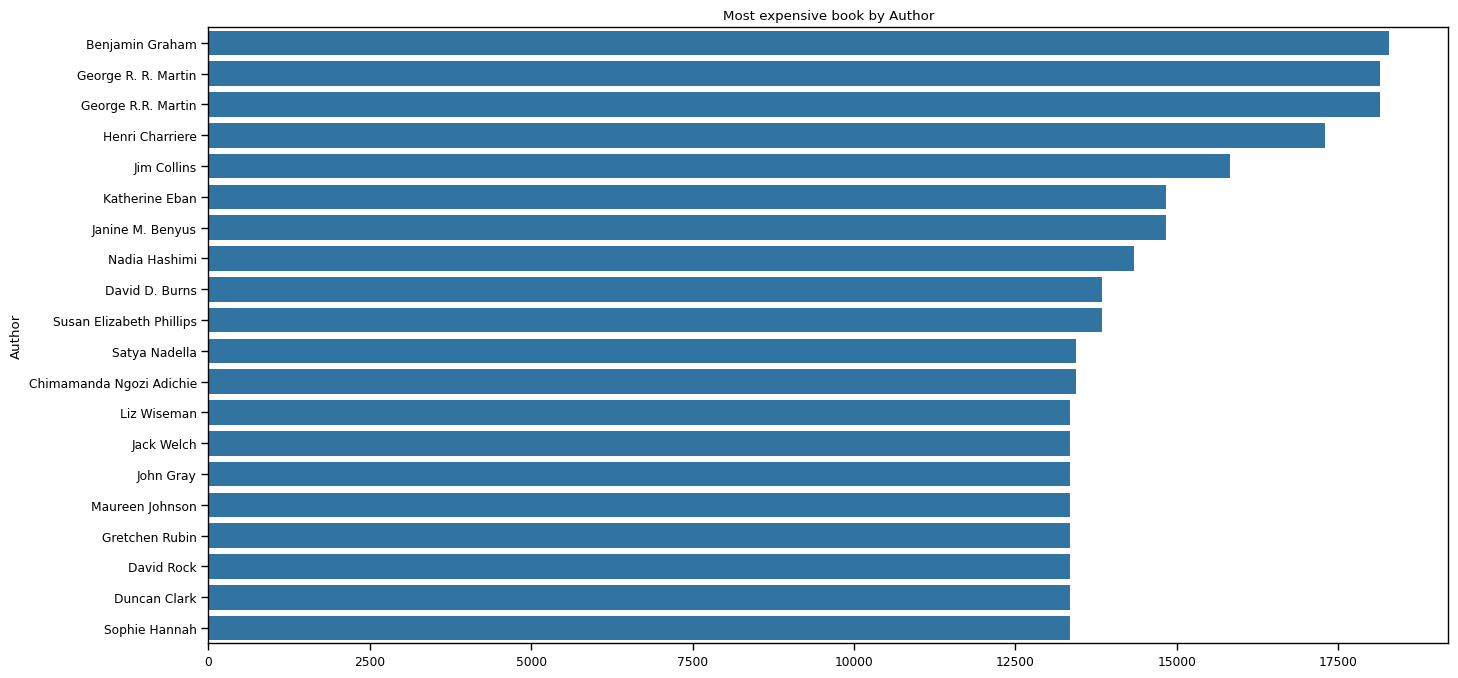

In [68]:
plt.figure(figsize=(16,8))

cnt = audiob_adv.groupby(['Author'])['Price'].max().sort_values(ascending=False).to_frame()[:20]
g2 = sns.barplot(x = cnt['Price'], y = cnt.index)
g2.set_title('Most expensive book by Author')
g2.set_ylabel('Author')
g2.set_xlabel('')

**Benjamin Graham**, the *greatest* investment advisor, has the most expensive book in the dataset.

### Highest Rated Author

Text(0.5, 0, '')

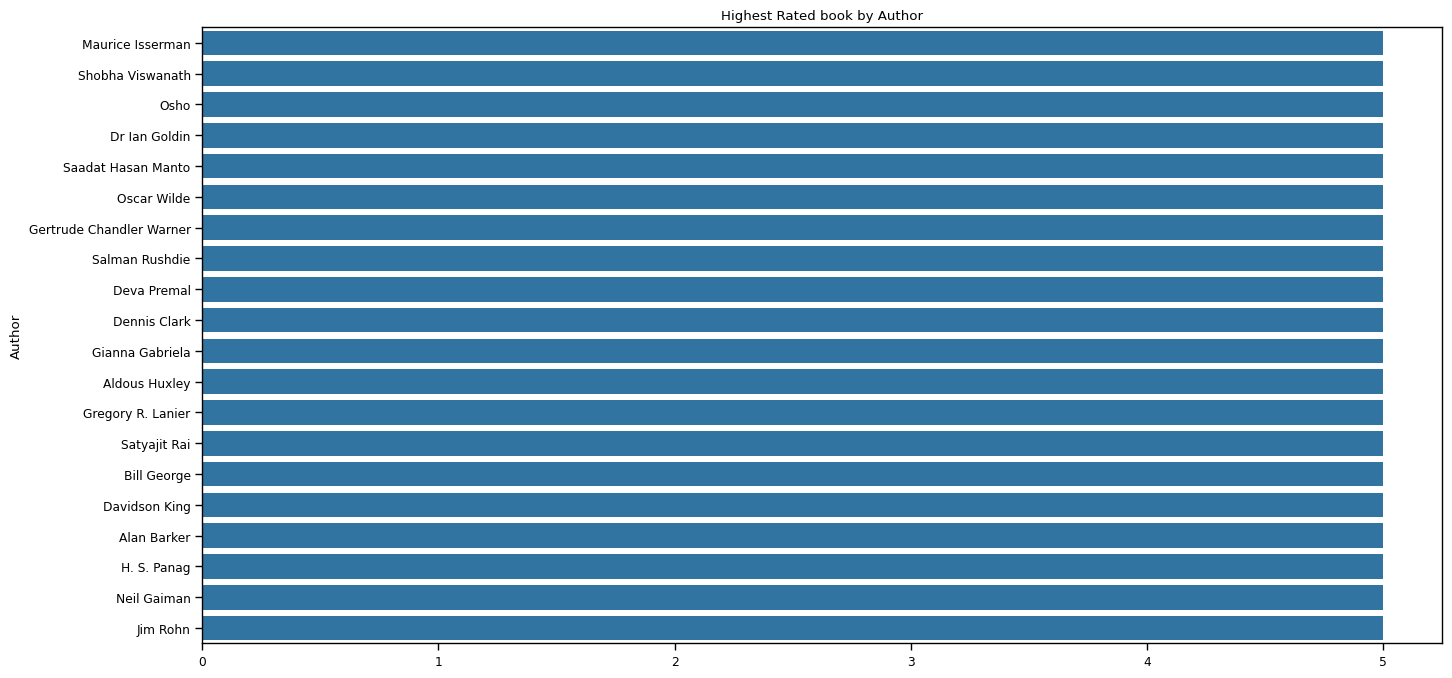

In [69]:
plt.figure(figsize=(16,8))

cnt = audiob_adv.groupby(['Author'])['Rating'].max().sort_values(ascending=False).to_frame()[:20]
g2 = sns.barplot(x = cnt['Rating'], y = cnt.index)
g2.set_title('Highest Rated book by Author')
g2.set_ylabel('Author')
g2.set_xlabel('')

We can see quite a lot of authors with perfect 5 ⭐ rating

I had to update Satyajit Ray's name. 😁 

In [70]:
audiob_adv.replace(to_replace='Satyajit Rai', value = 'Satyajit Ray', inplace=True)

### Lowest Rated Author

Text(0.5, 0, '')

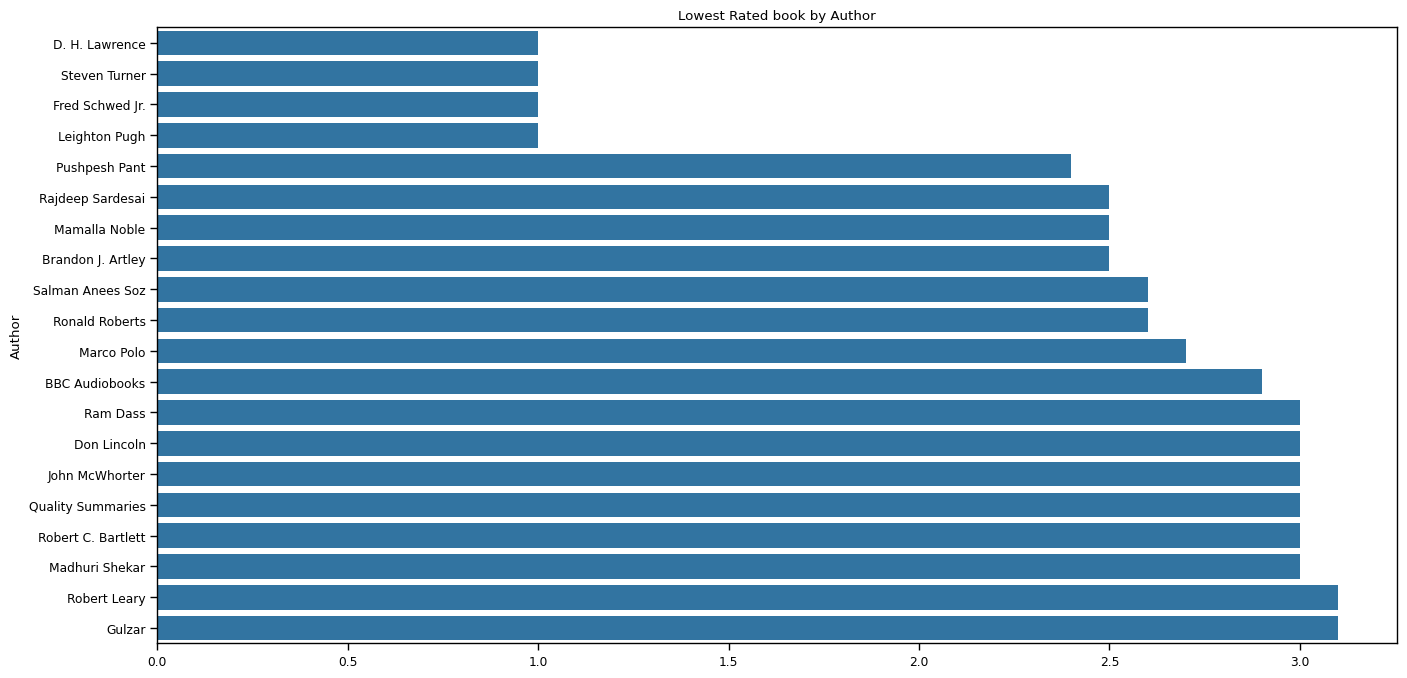

In [71]:
plt.figure(figsize=(16,8))

cnt = audiob_adv.groupby(['Author'])['Rating'].max().sort_values(ascending=True).to_frame()[:20]
g2 = sns.barplot(x = cnt['Rating'], y = cnt.index)
g2.set_title('Lowest Rated book by Author')
g2.set_ylabel('Author')
g2.set_xlabel('')

Seeing, D.H. Lawrence on the top was a real shock. On looking at the main site, I could see that the low rating was because of the corrupted file.

### Authors with shortest audio books

In [72]:
trial = audiob_adv[~(audiob_adv['Time']<20)]

Text(0.5, 0, '')

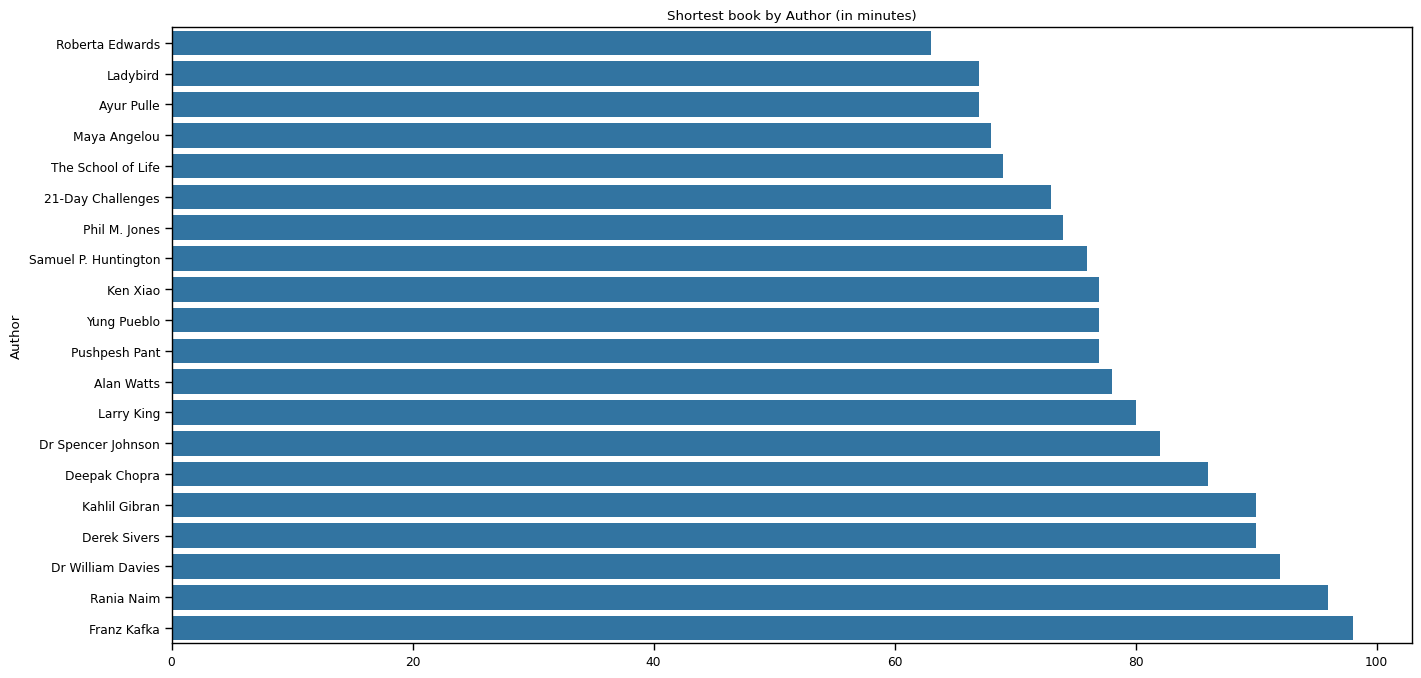

In [73]:
plt.figure(figsize=(16,8))

cnt = trial.groupby(['Author'])['Time'].max().sort_values(ascending=True).to_frame()[:20]
g2 = sns.barplot(x = cnt['Time'], y = cnt.index)
g2.set_title('Shortest book by Author (in minutes)')
g2.set_ylabel('Author')
g2.set_xlabel('')

We can **Roberta Edwards** having an audiobook of approximately 1 hour. Roberta Edwards publishes short "Who was..." audiobooks.

## Rating

### Average rating of books

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\4149466636.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating, bins=20)


<Axes: xlabel='Rating', ylabel='Density'>

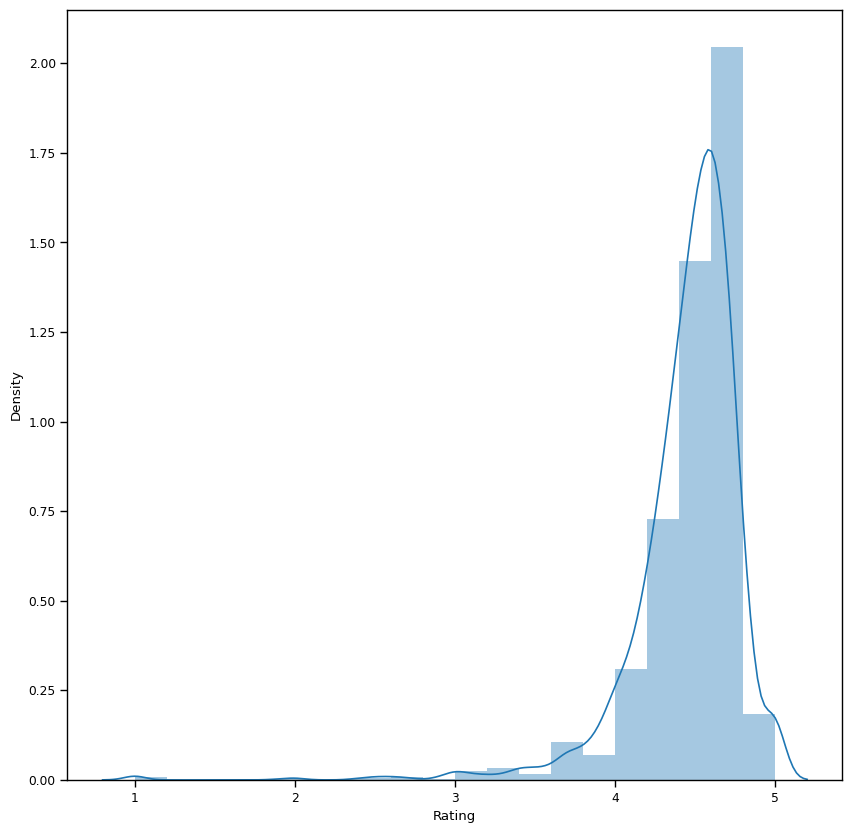

In [74]:
plt.figure(figsize=(10,10))
rating= audiob_adv.Rating.astype(float)
sns.distplot(rating, bins=20)

We can see that most of the rating between 4 and 5

### Time X Rating

<Figure size 1500x1000 with 0 Axes>

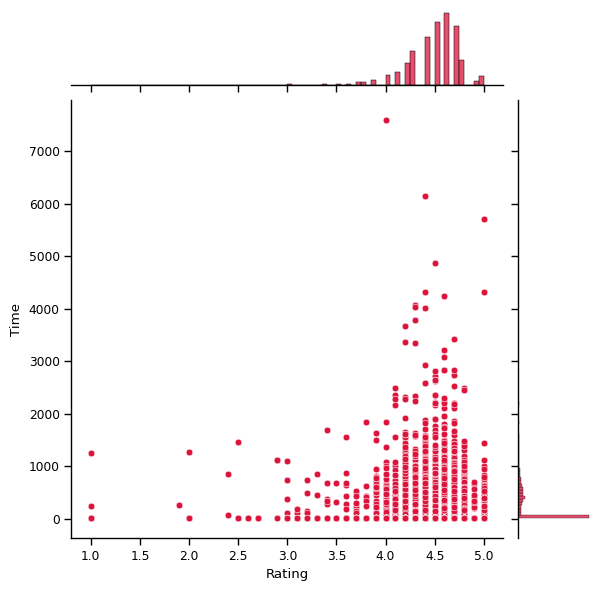

In [75]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="Rating", y="Time", data = audiob_adv, color = 'crimson')
ax.set_axis_labels("Rating", "Time")
plt.show()

We can see that most of the 5 star ratings are for books with approximately 35 hours of listening time.

### Rating X Price

<Figure size 1500x1000 with 0 Axes>

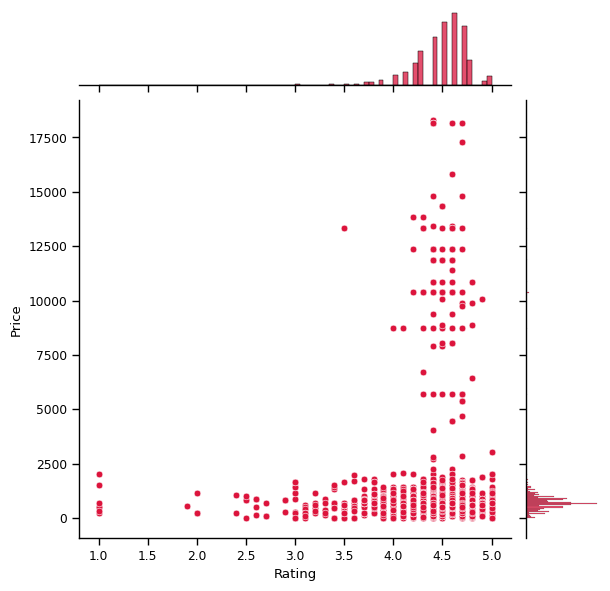

In [76]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="Rating", y="Price", data = audiob_adv, color = 'crimson')
ax.set_axis_labels("Rating", "Price")
plt.show()

The outliers in the dataset are skewing the data.

Taking a trial dataframe containing records with price less than 3000

In [77]:
trial = audiob_adv[~(audiob_adv['Price']>3000)]

<Figure size 1500x1000 with 0 Axes>

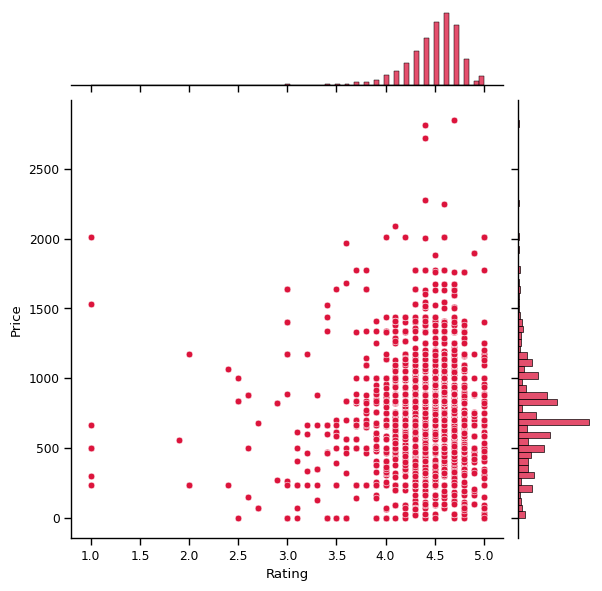

In [78]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="Rating", y="Price", data = trial, color = 'crimson')
ax.set_axis_labels("Rating", "Price")
plt.show()

We cannot see any linear relationship between both of them. But we can see a cluster of data, which has rating from 4 to 5 and price ranging from 0 to 1500.

### Rating X Reviews

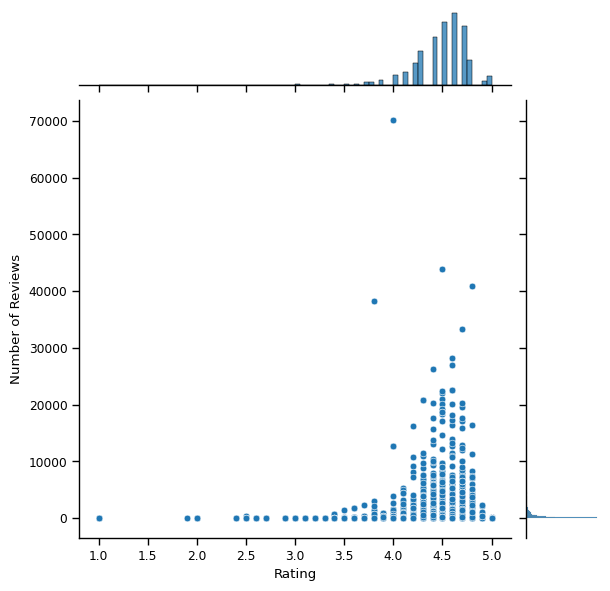

In [79]:
ax = sns.jointplot(x="Rating", y="Number_of_Reviews", data = audiob_adv)
ax.set_axis_labels("Rating", "Number of Reviews")

The rating 4.5 is given the most. We can see that, people give 1,2,3 and very less.

## Price

Let us see the correlations between different variables

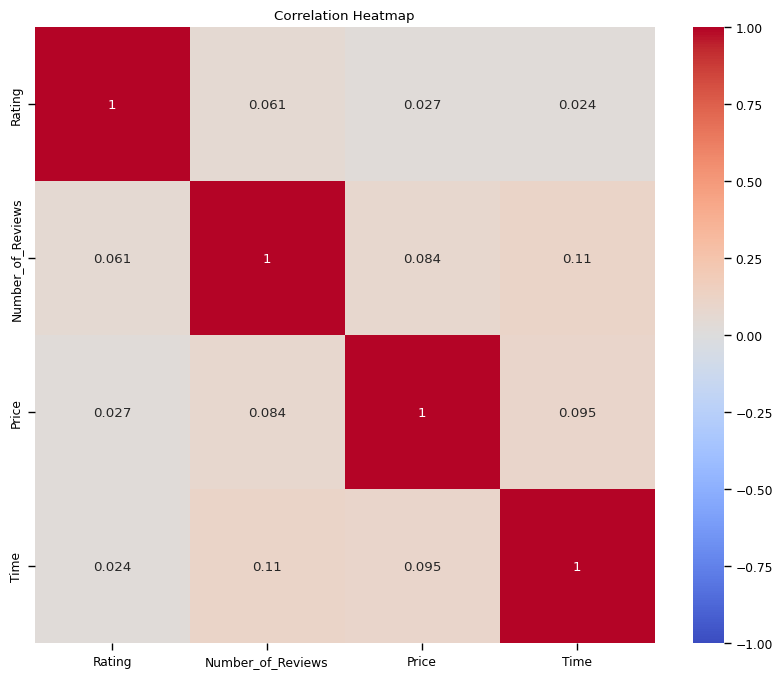

In [80]:
# Select only numeric columns
numeric_columns = audiob_adv.select_dtypes(include='number')

# Compute the correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


We cannot see any correlation between the variables. The highest correlation, we can see is **0.079** between *Number of Revews* and *Time*, which is weakly positive.

<Figure size 1500x1000 with 0 Axes>

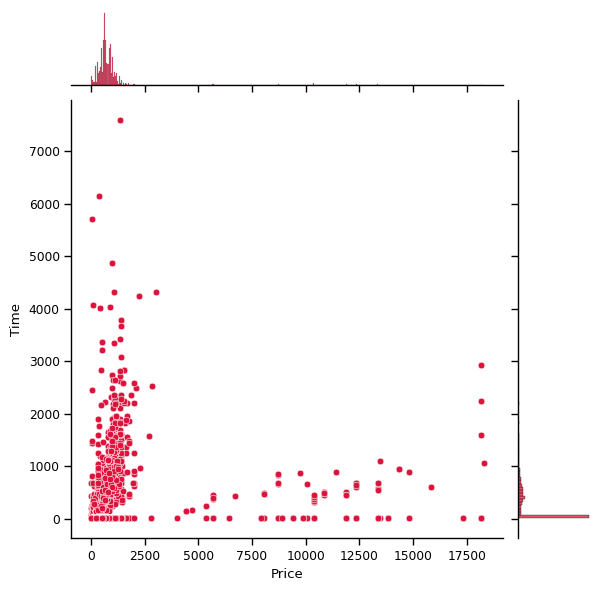

In [81]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="Price", y="Time", data = audiob_adv, color = 'crimson')
ax.set_axis_labels("Price", "Time")
plt.show()

Because, of the outliers, the analysis is highly skewed. That is why, we will take a temporary df without outliers.

In [82]:
trial = audiob_adv[~(audiob_adv['Price']>3000)]

<Figure size 1500x1000 with 0 Axes>

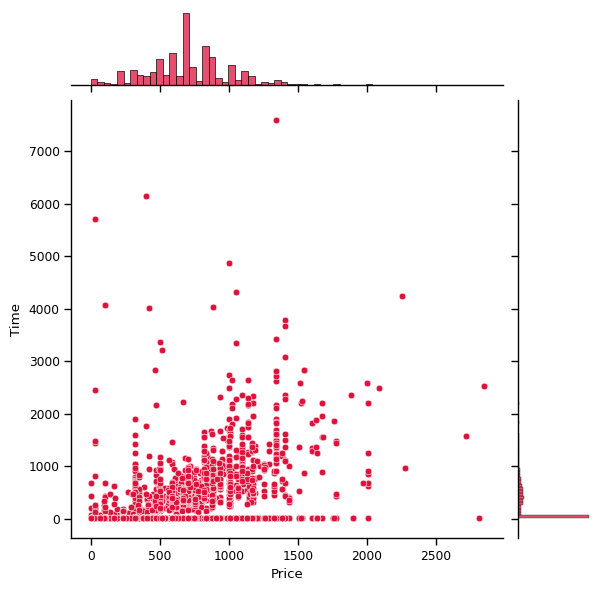

In [83]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="Price", y="Time", data = trial, color = 'crimson')
ax.set_axis_labels("Price", "Time")
plt.show()

Most of the books are less than 1200 and time is less that ~34 hours

C:\Users\peer1\AppData\Local\Temp\ipykernel_3000\4112983052.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rating, bins=20)


<Axes: xlabel='Time', ylabel='Density'>

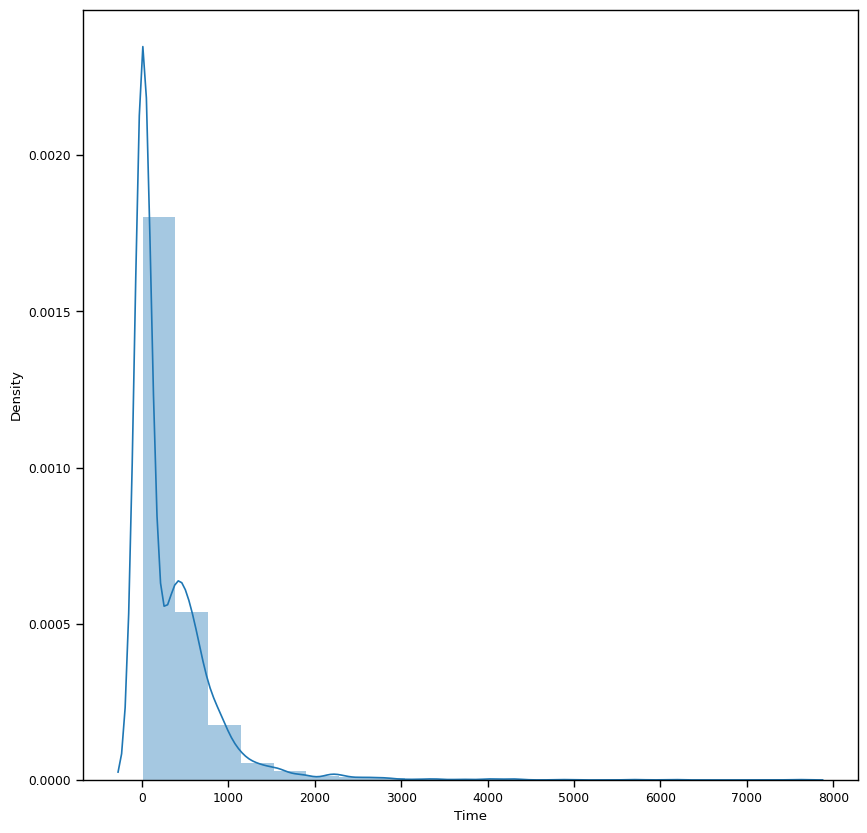

In [84]:
plt.figure(figsize=(10,10))
rating= audiob_adv.Time.astype(float)
sns.distplot(rating, bins=20)

Most of the books are less than ~34 hours

In [39]:
audiob

,Book Name,Author,Rating,Number of Reviews,Price
0,Think Like a Monk: The Secret of How to Harnes...,Jay Shetty,4.9,313.0,10080.0
1,Ikigai: The Japanese Secret to a Long and Happ...,Héctor García,4.6,3658.0,615.0
2,The Subtle Art of Not Giving a F*ck: A Counter...,Mark Manson,4.4,20174.0,10378.0
3,Atomic Habits: An Easy and Proven Way to Build...,James Clear,4.6,4614.0,888.0
4,Life's Amazing Secrets: How to Find Balance an...,Gaur Gopal Das,4.6,4302.0,1005.0
...,...,...,...,...,...
6363,The Hot Flash Club,Nancy Thayer,4.3,191.0,1131.0
6364,The Prophet & The Wanderer,Khalil Gibran,4.1,6.0,539.0
6365,Make Today Count: The Secret of Your Success I...,John C. Maxwell,4.7,301.0,500.0
6366,25 Hours a Day: Going One More to Get What You...,Nick Bare,4.7,285.0,501.0


In [56]:

audiob.to_csv('Cleaned_audiob.csv', index=False)


In [41]:

audiob_adv.to_csv('Cleaned_audiob_adv.csv', index=False)
